# Employee Exit Surveys

We enter this project with two questions for hypothetical stakeholders:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We are given two datasets that contain answers to surveys pertinent to these two stakeholder questions, dete_survey and tafe_survey.

In [54]:
import pandas as pd #Importing Pandas library
import numpy as np #Importing NumPy library

In [55]:
dete = pd.read_csv('dete_survey.csv') #Reading in the Dete survey
tafe = pd.read_csv('tafe_survey.csv') #Reading in Tafe survey

Dete Dataset Info

In [56]:
print(dete.info())
print('\n')
print(dete.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

There are 56 columns, with 822 rows of data. Because of the immense quantity of columns, I'm sure we will cut down that number, scraping off the unnecessary information from the dataset. There are also values that have 'Not Stated', which indicate missing values not represented as NaN's.

Tafe Survey Info

In [57]:
print(tafe.info())
print('\n')
print(tafe.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

The Tafe survey dataset has 72 columns! Even more than the Dete dataset, meaning many more columns we need to excise. There are 700 rows, just 100 short of the Dete dataset, but that's fine.

# Observing null Statistics

In [58]:
dete.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

There are many columns with many rows of data filled with null values, like:
- Classification
- Business Unit
- Aboriginal
- Torres Strait
- South Sea
- Disability
- NESB

In [59]:
tafe.isnull().sum()[0:30]

Record ID                                                                                                  0
Institute                                                                                                  0
WorkArea                                                                                                   0
CESSATION YEAR                                                                                             7
Reason for ceasing employment                                                                              1
Contributing Factors. Career Move - Public Sector                                                        265
Contributing Factors. Career Move - Private Sector                                                       265
Contributing Factors. Career Move - Self-employment                                                      265
Contributing Factors. Ill Health                                                                         265
Contributing Factor

In [60]:
tafe.isnull().sum()[30:70]

InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly                                                                                101
WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit                                                   93
WorkUnitViews. Topic:15. I worked well with my colleagues                                                                                                         97
WorkUnitViews. Topic:16. My job was challenging and interesting                                                                                                   95
WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work                                                                           92
WorkUnitViews. Topic:18. I had sufficient contact with other people in my job                                                                                     89
WorkUnitVi

This output is a bit confusing to read, but we will clarify this output in the next step.  

# Erasing Not Stated and Irrelevant Columns

In [61]:
dete = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
# This will read in Not Stated values as NaN, easier to clarify

In [62]:
dete_updated = dete.drop(dete.columns[28:49], axis = 1)

The columns from 28-49 of dete contain data irrelevant to the questions we are attempting to solve, so we can shorten the dataset to remove some clutter. 

In [63]:
tafe_updated = tafe.drop(tafe.columns[17:66], axis = 1)

Again we remove the clutter, getting rid of columns not needed to answer our question as to why people are quitting.

# Editing Column Names

Since we will eventually combine these two datasets, it's imperative we make the column names singular and match as best as we can.

In [64]:
dete_updated.columns = dete_updated.columns.str.replace(' ','_').str.lower().str.strip()

In [65]:
dete_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

Just use this .info() to make sure the renaming function went into effect correctly. 

In [66]:
columns_renamed = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
                   'Reason for ceasing employment': 'separationtype',
                   'Gender. What is your Gender?': 'gender',
                   'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status',
                   'Classification. Classification': 'position', 
                   'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                   'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [67]:
tafe_updated = tafe_updated.rename(columns_renamed, axis = 1)

In [68]:
tafe_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Same thing with the tafe dataset. 

# Sorting by Resignation Type

There are many ways an employee can leave a company, we will sort out the databases so that we only analyze employees that have resigned.

In [69]:
tafe_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [70]:
dete_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

So now we will remove the rows that don't have a resignation value in this column.

In [71]:
tafe_resign = tafe_updated[tafe_updated['separationtype'] == 'Resignation'].copy()

In [72]:
tafe_resign['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

So the Tafe dataset we now have a set 'tafe_resign', which only has resignation as the separationtype.

In [73]:
dete_updated['separationtype'] = dete_updated['separationtype'].str.split('-').str[0]
# The split separates values in this column that include a - into two values, 
# and then the str[0] picks the first one, which is the 'Separation'.

In [74]:
dete_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

Now all the resignation values are combined into one unique output.

In [75]:
dete_resign = dete_updated[dete_updated['separationtype'] == 'Resignation'].copy()

In [76]:
dete_resign['separationtype'].value_counts()

Resignation    311
Name: separationtype, dtype: int64

Now we also have a dete resignation dataset as well.

# Checking Date Inconsistencies

Now we will see if there are inconsistencies in the date columns. For example, given that most people in this field apparently are in their 20s, a start date from the 40s wouldn't make logical sense. 

In [77]:
dete_resign['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [78]:
# Split the data if it includes a / to only take the year, so that we can 
# sort the values to analyze a bit more easily. 
dete_resign['cease_date'] = dete_resign['cease_date'].str.split('/').str[-1]
dete_resign['cease_date'] = dete_resign['cease_date'].astype("float")

In [79]:
# Checking if the previous line of code worked correctly.
dete_resign['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [80]:
# Check the value counts and look for outliers
dete_resign['dete_start_date'].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [81]:
# Checking unique values
tafe_resign['cease_date'].value_counts().sort_index(ascending = False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

From this we found that the cease_date columns don't have exactly aligning data, but since we aren't analyzing by exact year this shouldn't pose that much of a problem. 

# Creating New Column

Remember we are attempting to answer the main question of:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In HR, the length of time an employee spend in a workplace is referred to as their years of service. In tafe_resign, there is already a service column named 'institute_service'. To analyze both surveys, we need to create a similar column in dete_resign called 'institute_service'.

In [82]:
dete_resign['institute_service'] = dete_resign['cease_date'] - dete_resign['dete_start_date']


In [83]:
dete_resign['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

Now we've successfully created this new column that matches the column from tafe_resign.

# Marking as Dissatisfied

In the tafe_updated dataset we have two columns to identify a dissatisfied employee:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

In the dete_updated dataset we have nine columns to do the same thing:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employee_conditions
- work_life_balance
- workload

If the employee indicated any of the factors listed above we will mark them as dissatisfied in a new column via this system:
- True
    - Indicates a person resigned because they were dissatisfied with the job
- False
    - Indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN
    - Indicates the value is missing

In [84]:
tafe_resign['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [85]:
tafe_resign['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [86]:
# Function for analyzing 
def update_vals(input):
    if input == '-':
        return False
    elif pd.isnull(input):
        return np.nan
    else:
        return True

In [87]:
tafe_resign['dissatisfied'] = tafe_resign[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
# Apply the update_vals function towards tafe columns

In [88]:
tafe_resign_up = tafe_resign.copy()
# Making new copy of the dataset 

In [89]:
tafe_resign_up['dissatisfied'].value_counts(dropna = False)
# Observing Dissatisfaction in tafe dataset

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [90]:
dete_resign['dissatisfied'] = dete_resign[['job_dissatisfaction',
                                          'dissatisfaction_with_the_department',
                                          'physical_work_environment', 'lack_of_recognition',
                                          'lack_of_job_security','work_location','employment_conditions',
                                          'work_life_balance', 'workload']].any(1, skipna = False)
# Making new column and updating values to be either true, false or NaN

In [91]:
dete_resign_up = dete_resign.copy()
#Creating a copy of the dataset

In [92]:
dete_resign_up['dissatisfied'].value_counts(dropna = False)
# Observing Dissatisfaction in the dete dataset

False    162
True     149
Name: dissatisfied, dtype: int64

So now we have two new datasets with a new column in each survey, that state whether or not the employee was dissatisfied upon his/her leaving of the company. 

# Differentiate Between Datasets

Before we combine the two datasets, we will have to make a identifier to recognize where each row came from. Therefore we will need to make a column to accomplish that goal. 

In [93]:
dete_resign_up['institute'] = 'DETE'
# Make a column that gives each row a value of DETE

In [94]:
tafe_resign_up['institute'] = 'TAFE'
# Make a column that gives each row a value of TAFE

In [95]:
dete_resign_up.head() # Just checking if the column was made

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [96]:
tafe_resign_up.head() # Again checking 

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [97]:
combined = pd.concat([dete_resign_up, tafe_resign_up], ignore_index = True)

In [98]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [99]:
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()
# Dropping columns that have non-null values of less than 500
# Axis = 1 makes sure that we are targeting columns

In [100]:
combined_updated.notnull().sum().sort_values()
# Checking if the previous line of code worked

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
separationtype       651
institute            651
dtype: int64

Now we have a dataset with a lot of data, cutting out all the columns that were bogged down with a large amount of null values. 

# Categorizing Seniority

In [101]:
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


As of now we have a column 'institute service' that has many values that can confuse and overcomplicate things. Therefore we will identify seniority by groups so analysis is easier. 
- New: Less than 3 years at a company. 
- Experienced: 3-6 years at a company. 
- Established: 7-10 years at a company. 
- Veteran: 11 or more years at a company. 

In [103]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')
# (r'(\d+)') means the input is transformed into raw string notation, 
# and then parentheses indicate a capturing group, with \d+ meaning
# we catch 'digit' groups

In [104]:
def transform_service(year):
    if year >= 11:
        return 'Veteran'
    elif 7 <= year < 11:
        return 'Established'
    elif 3 <= year < 7:
        return 'Experienced'
    elif pd.isnull(year):
        return np.nan
    else:
        return 'New'

In [105]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(transform_service)
# Applying the function towards the column to categorize
# seniority. 

In [106]:
combined_updated['service_cat'].value_counts()
# Checking if categorization worked

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

Now we've got easily categorized seniorities assigned to employees that have resigned. 

# Initial Analyses

First off, we can resolve missing values in the dissatisfied column by transforming null values into False. Then we can calculate the percentage of emoployees who resigned due to dissatisfaction and group by their tenure length with the company. 

In [107]:
combined_updated['dissatisfied'].value_counts(dropna = False)
# Counting values in the dissatisfied column

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [108]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
# Transforms null values into False

In [109]:
combined_updated['dissatisfied'].value_counts(dropna = False)
#Checking if previous line of code worked

False    411
True     240
Name: dissatisfied, dtype: int64

In [115]:
combined_piv = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied').sort_values(by = 'dissatisfied',ascending = False)
combined_piv 
# Creating a pivot table 

,dissatisfied
service_cat,
Established,0.516129
Veteran,0.485294
Experienced,0.343023
New,0.295337


It appears the more senior members of the company left with a taste of dissatisfaction moreso than the younger members. We can still graph this for a more visual representation.

In [117]:
%matplotlib inline # Line that allows visuals to plot in Jupyter directly. 

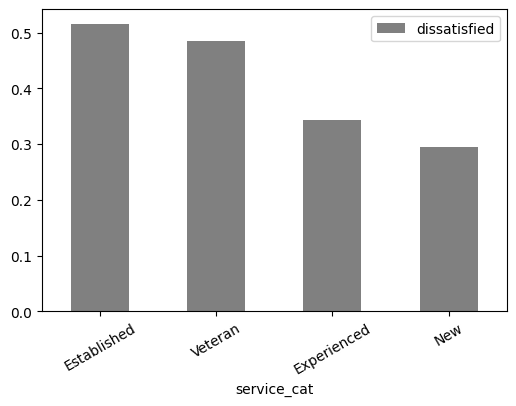

In [127]:
combined_piv.plot(kind = 'bar', rot = 30, color = 'grey')

# Conclusion

This project was mainly focused on cleaning data, but with the dataset given we discovered more senior employees at this company felt dissatisfied when leaving. 